In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

using Colors
using JLD2
using LinearAlgebra
using Distributions
using StatsPlots
using Plots; default(label="", grid=false, markersize=3, margin=15Plots.pt)

  Activating project at `/home/synd/Wouter/Onderzoek/Projecten/tue/efe-acquisition/marxefe-mp`


In [2]:
Δt = 0.1
len_time = 100
tsteps = range(0, step=Δt, length=len_time)

0.0:0.1:9.9

In [11]:
trialnum = 10
trialnumpad = lpad(trialnum, 3, '0')
results = load("results/MARXEFE-botnav-trialnum$trialnumpad.jld2")

T       = results["len_horizon"] 
N       = results["len_trial"]
goal    = results["goal"]
z_0     = results["z_0"]
z_sim   = results["z_sim"]
plans_m = results["plans_m"]
plans_S = results["plans_S"];

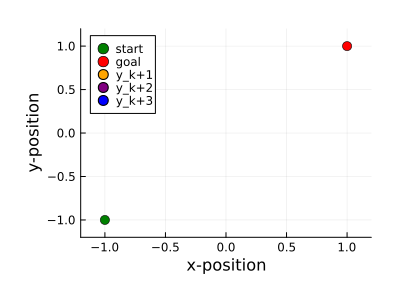

In [42]:
tpoint = 80
clrs = ["orange", "purple", "blue"]
scatter([z_0[1]], [z_0[2]], label="start", color="green", markersize=5)
scatter!([mean(goal)[1]], [mean(goal)[2]], label="goal", color="red", markersize=5)
# plot!(z_sim[1,1:tpoint], z_sim[2,1:tpoint], linewidth=3, label="system path", color="blue")
for tt in 1:T
    scatter!([plans_m[1,tt,tpoint]], [plans_m[2,tt,tpoint]], label="y_k+$tt", color=clrs[tt])
    covellipse!(plans_m[:,tt,tpoint], plans_S[:,:,tt,tpoint], n_std=1, alpha=0.1, fillalpha=0.5^tt, color=clrs[tt])
end
plot!(xlims=(-1.2, 1.2), ylims=(-1.2, 1.2), grid=true, size=(400,300), xlabel="x-position", ylabel="y-position")

In [43]:
savefig("figures/MARXEFE-botnav-plans-tpoint$tpoint.png")

"/home/synd/Wouter/Onderzoek/Projecten/tue/efe-acquisition/marxefe-mp/experiments/figures/MARXEFE-botnav-plans-tpoint80.png"